# Visualize the Comparison between Neutrophil Signatures

**Gregory Way, 2018**

Comparing DAE z = 6 feature 2 to VAE z = 3 feature 1.
Visualization with ggplot2.

In [1]:
library(ggplot2)
library(ggrepel)
suppressPackageStartupMessages(library(dplyr))

In [2]:
file <- file.path('results', 'latent_feature_enrichment_comparison_neutrophil_genesets.tsv')
geneset_weights_df <- (
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            model_type_vae = readr::col_character(),
                                            variable = readr::col_character(),
                                            algorithm_vae = readr::col_character(),
                                            model_type_dae = readr::col_character(),
                                            algorithm_dae = readr::col_character()))
    )

head(geneset_weights_df)

model_type_vae,variable,value_vae,z_score_vae,algorithm_vae,feature_vae,z_vae,seed_vae,model_type_dae,value_dae,z_score_dae,algorithm_dae,feature_dae,z_dae,seed_dae
real,Neutrophils_IRIS_1,-2.72158,-42.5443,vae,1,3,174930,real,-4.98508,-70.69960,dae,2,6,229564
real,Neutrophils_HPCA_3,-6.12055,-17.8212,vae,1,3,174930,real,-6.32430,-15.11390,dae,2,6,229564
real,Neutrophils_FANTOM_1,-4.65762,-17.3036,vae,1,3,174930,real,-5.38460,-4.34400,dae,2,6,229564
real,Neutrophils_HPCA_2,-4.57925,-16.5147,vae,1,3,174930,real,-5.16936,-5.58463,dae,2,6,229564
real,Monocytes_NOVERSHTERN_1,-14.58140,-15.0630,vae,1,3,174930,real,-11.90590,-3.57134,dae,2,6,229564
real,Hepatocytes_FANTOM_3,-21.31010,-14.8810,vae,1,3,174930,real,-36.76510,-19.54250,dae,2,6,229564


In [3]:
color_logic <- ((geneset_weights_df$z_score_vae < -16 | geneset_weights_df$z_score_vae > 18) |
                (geneset_weights_df$z_score_dae < -17))

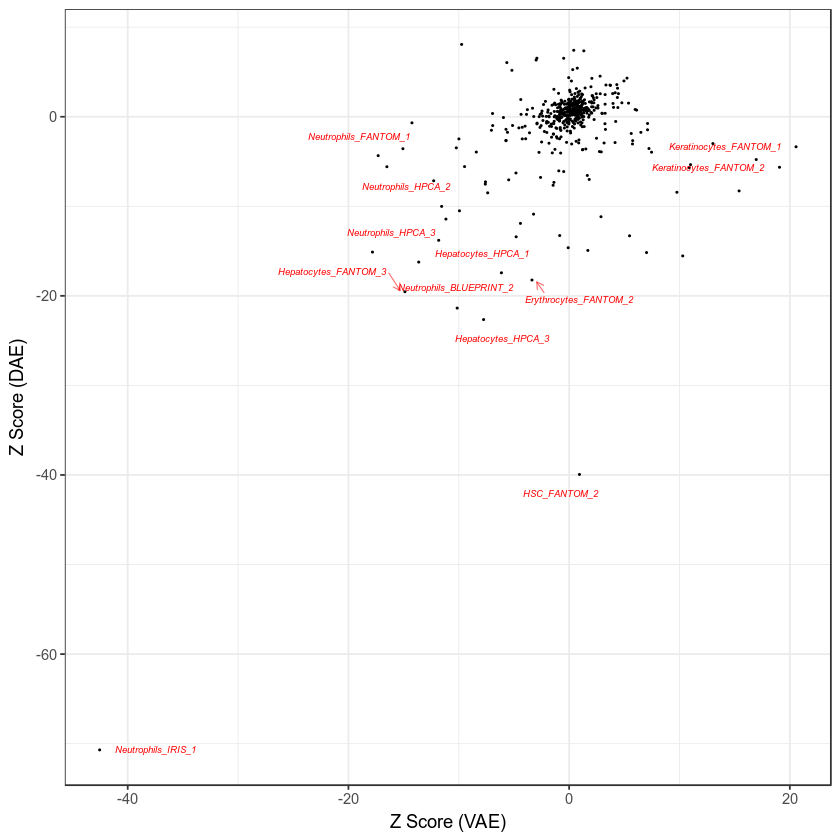

In [4]:
ggplot(geneset_weights_df, aes(x = z_score_vae, y = z_score_dae)) +
  geom_point(size = 0.2) +
  geom_text_repel(data = subset(geneset_weights_df, color_logic),
                  arrow = arrow(length = unit(0.01, "npc")),
                  segment.size = 0.3,
                  segment.alpha = 0.6,
                  color = 'red',
                  size = 2,
                  fontface = "italic",
                  point.padding = 0.4,
                  aes(x = z_score_vae, y = z_score_dae, label = variable)) +
  xlab("Z Score (VAE)") +
  ylab("Z Score (DAE)") +
  theme_bw()

fig_file <- file.path("figures", "feature_comparison_genesets.png")
ggsave(fig_file, height = 4.5, width = 6, dpi = 500)

In [5]:
file <- file.path('results', 'latent_feature_enrichment_comparison_neutrophil_genes.tsv')
gene_weights_df <- (
    readr::read_tsv(file,
                    col_types = readr::cols(.default = readr::col_double(),
                                            classification = readr::col_character(),
                                            gene = readr::col_character(),
                                            gene_set = readr::col_character()))
    )

geneset_classes <- c('Neutrophils', 'Hematopoetic', 'Skeletal Muscle',
                     'Hepatocytes', 'Other Geneset', 'No Geneset')
gene_weights_df$classification <- factor(gene_weights_df$classification, geneset_classes)

head(gene_weights_df, 3)

pca_0_3,pca_1_3,pca_2_3,ica_0_3,ica_1_3,ica_2_3,nmf_0_3,nmf_1_3,nmf_2_3,vae_0_3,⋯,vae_5,dae_0_6,dae_1_6,dae_2_6,dae_3,dae_4,dae_5,classification,gene,gene_set
0.004391464,-0.003970687,0.001467543,-1.268685e-05,-1.261367e-05,8.227824e-07,0,0,0.03380136,0.23681790,⋯,-0.1606996,-0.06671580,-0.3770417,-0.6882205,-0.4010708,-0.16090807,-0.3320840,Neutrophils,3043,Neutrophils_HPCA_3
0.003391244,-0.003176906,0.001365699,-1.037523e-05,-9.998654e-06,1.456414e-06,0,0,0.02834732,0.21351804,⋯,-0.1419666,-0.06037586,-0.4888425,-0.6538461,-0.4973300,-0.15148766,-0.4334082,No Geneset,No Geneset,No Geneset
0.001971815,-0.005422604,0.007662884,-2.323439e-05,-1.450438e-05,2.520380e-05,0,0,0.08123497,0.09917364,⋯,-0.1116227,-0.07477307,-0.8763335,-0.5920735,-0.8920222,0.01171566,-0.8330862,Other Geneset,6280,Keratinocytes_FANTOM_3


In [6]:
other_df <- gene_weights_df %>% dplyr::filter(classification %in% c('Other Geneset', 'No Geneset'))
neut_df <- gene_weights_df %>% dplyr::filter(!(classification %in% c('Other Geneset', 'No Geneset')))

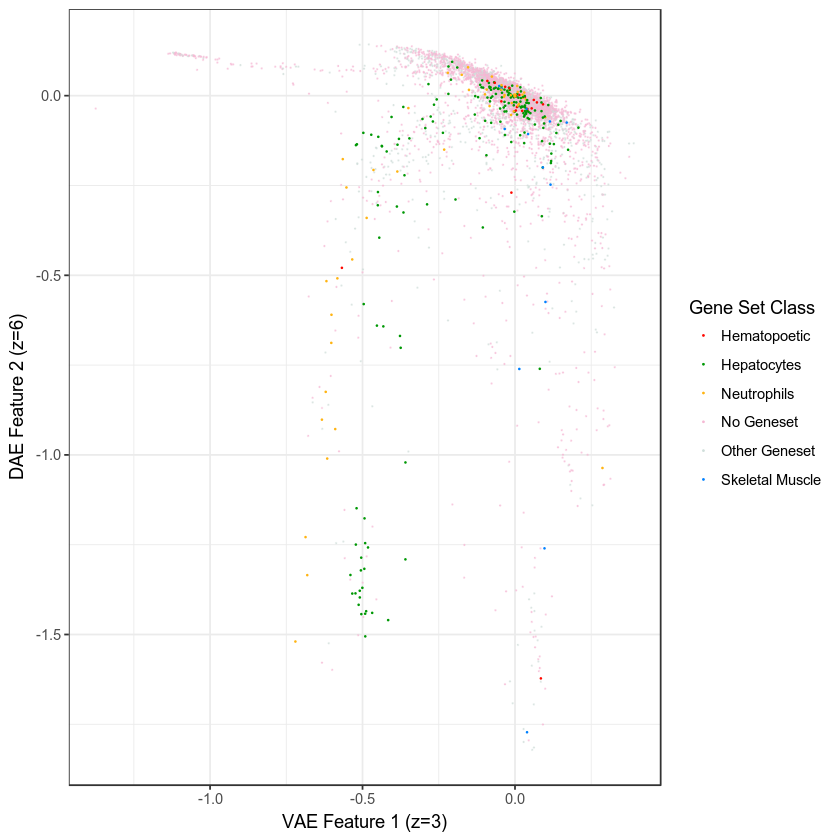

In [7]:
ggplot(gene_weights_df, aes(x = vae_1_3, y = dae_2_6, color = classification)) +
  geom_point(data = other_df, size = 0.05, alpha = 0.5) +
  geom_point(data = neut_df, size = 0.1) +
  scale_color_manual(name = "Gene Set Class",
                     values = c("Neutrophils" = "#FFB413",
                                "Hematopoetic" = "#FF0800",
                                "Skeletal Muscle" = "#0080FF",
                                "Hepatocytes" = "#009805",
                                "Other Geneset" = "#CFDEDA",
                                "No Geneset" = "#F5B8D4"),
                     labels = c("Neutrophils" = "Neutrophils",
                                "Hematopoetic" = "Hematopoetic",
                                "Skeletal Muscle" = "Skeletal Muscle",
                                "Hepatocytes" = "Hepatocytes",
                                "Other Geneset" = "Other Geneset",
                                "No Geneset" = "No Geneset")) +
  xlab("VAE Feature 1 (z=3)") +
  ylab("DAE Feature 2 (z=6)") +
  theme_bw()

fig_file <- file.path("figures", "feature_comparison_genes.png")
ggsave(fig_file, height = 4.5, width = 6, dpi = 500)